# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2508,2516,2511.000000,2509,2507,2507,2507,2517,2514,2510,2519.000000,2514,2511.000000,2516.000000,2510.000000,2513
unique,2484,495,NaN,2485,2,43,681,591,100,3,NaN,4,NaN,NaN,NaN,360
top,TX001748,AC00362,NaN,2023-10-20 17:53:13,Debit,Fort Worth,D000573,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,2,12,NaN,2,1942,71,9,12,46,868,NaN,657,NaN,NaN,NaN,18
mean,NaN,NaN,297.656468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.678444,NaN,119.422939,1.121622,5113.438124,NaN
std,NaN,NaN,292.230367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.837359,NaN,70.078513,0.594469,3897.975861,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.727500,NaN
50%,NaN,NaN,211.360000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.000000,1.000000,4734.110000,NaN
75%,NaN,NaN,413.105000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7672.687500,NaN


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

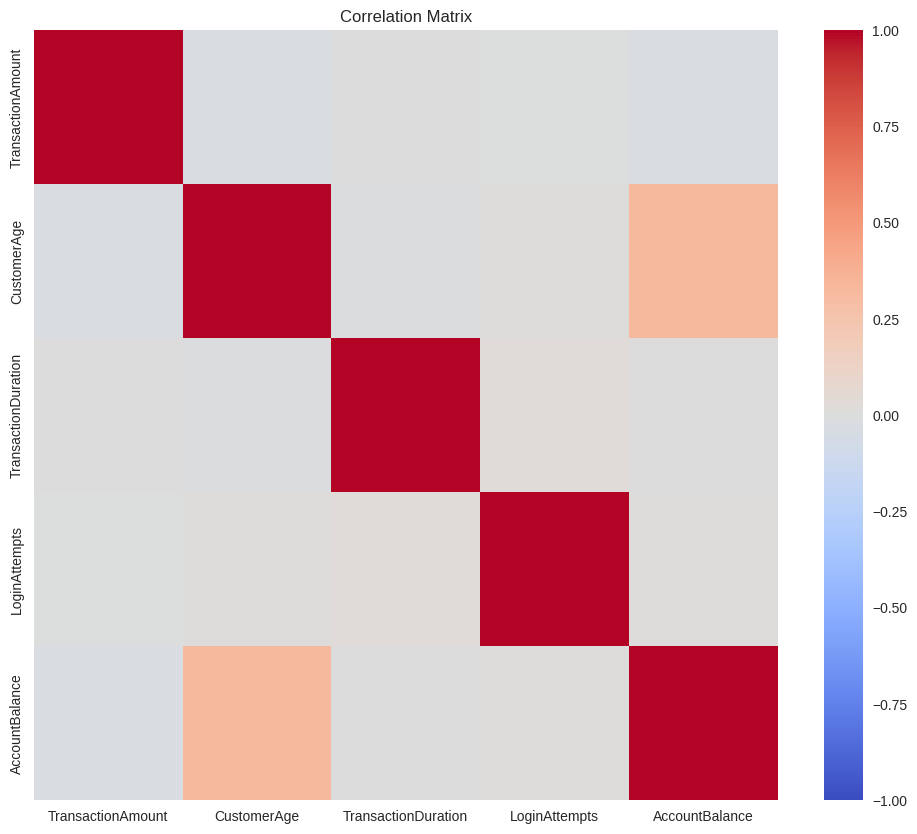

In [6]:
plt.figure(figsize=(12,10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix')
plt.show()

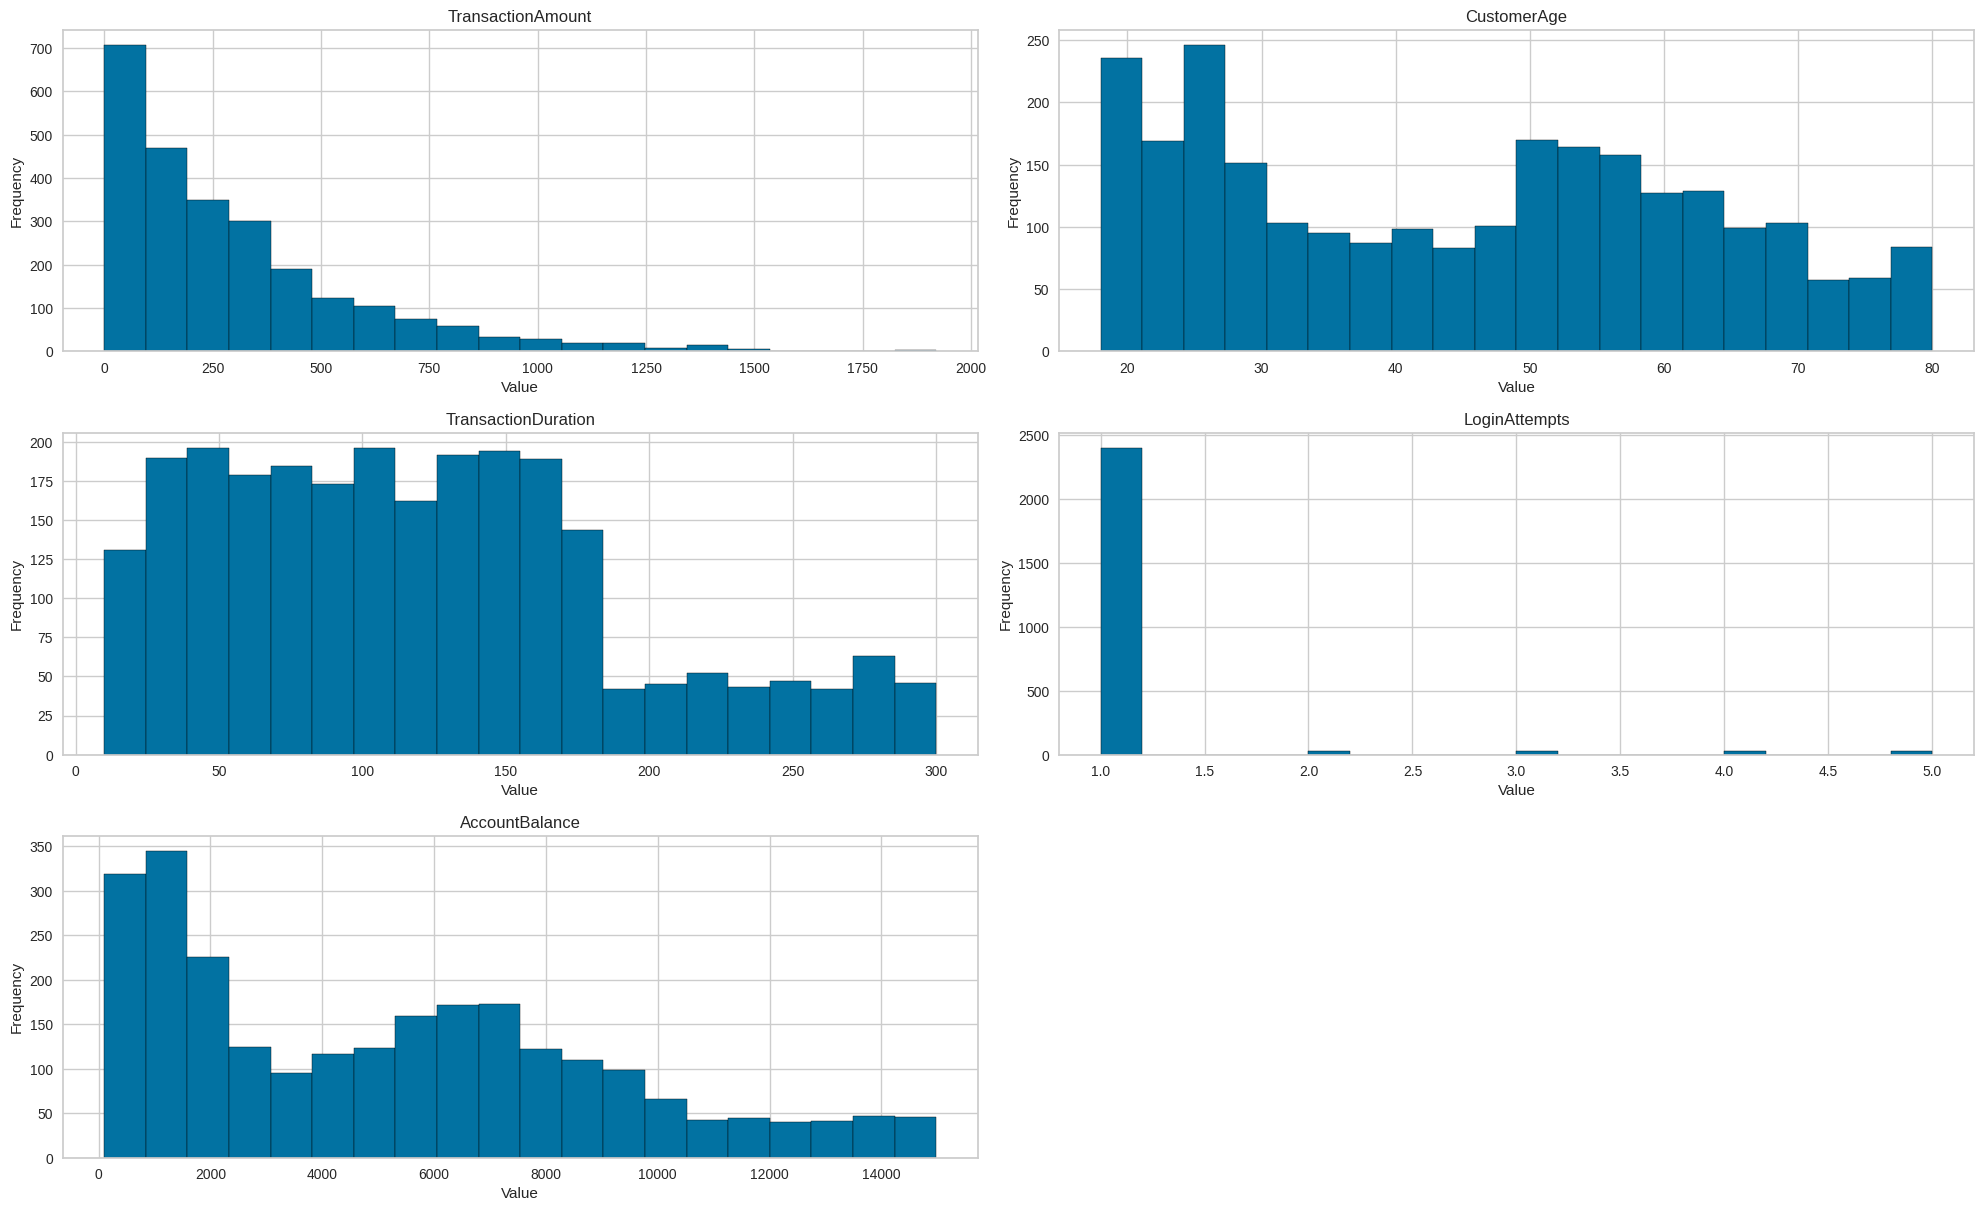

In [7]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

num_vars = df.shape[1]

n_cols = 2
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

for i, column in enumerate(df[numerical_cols]):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

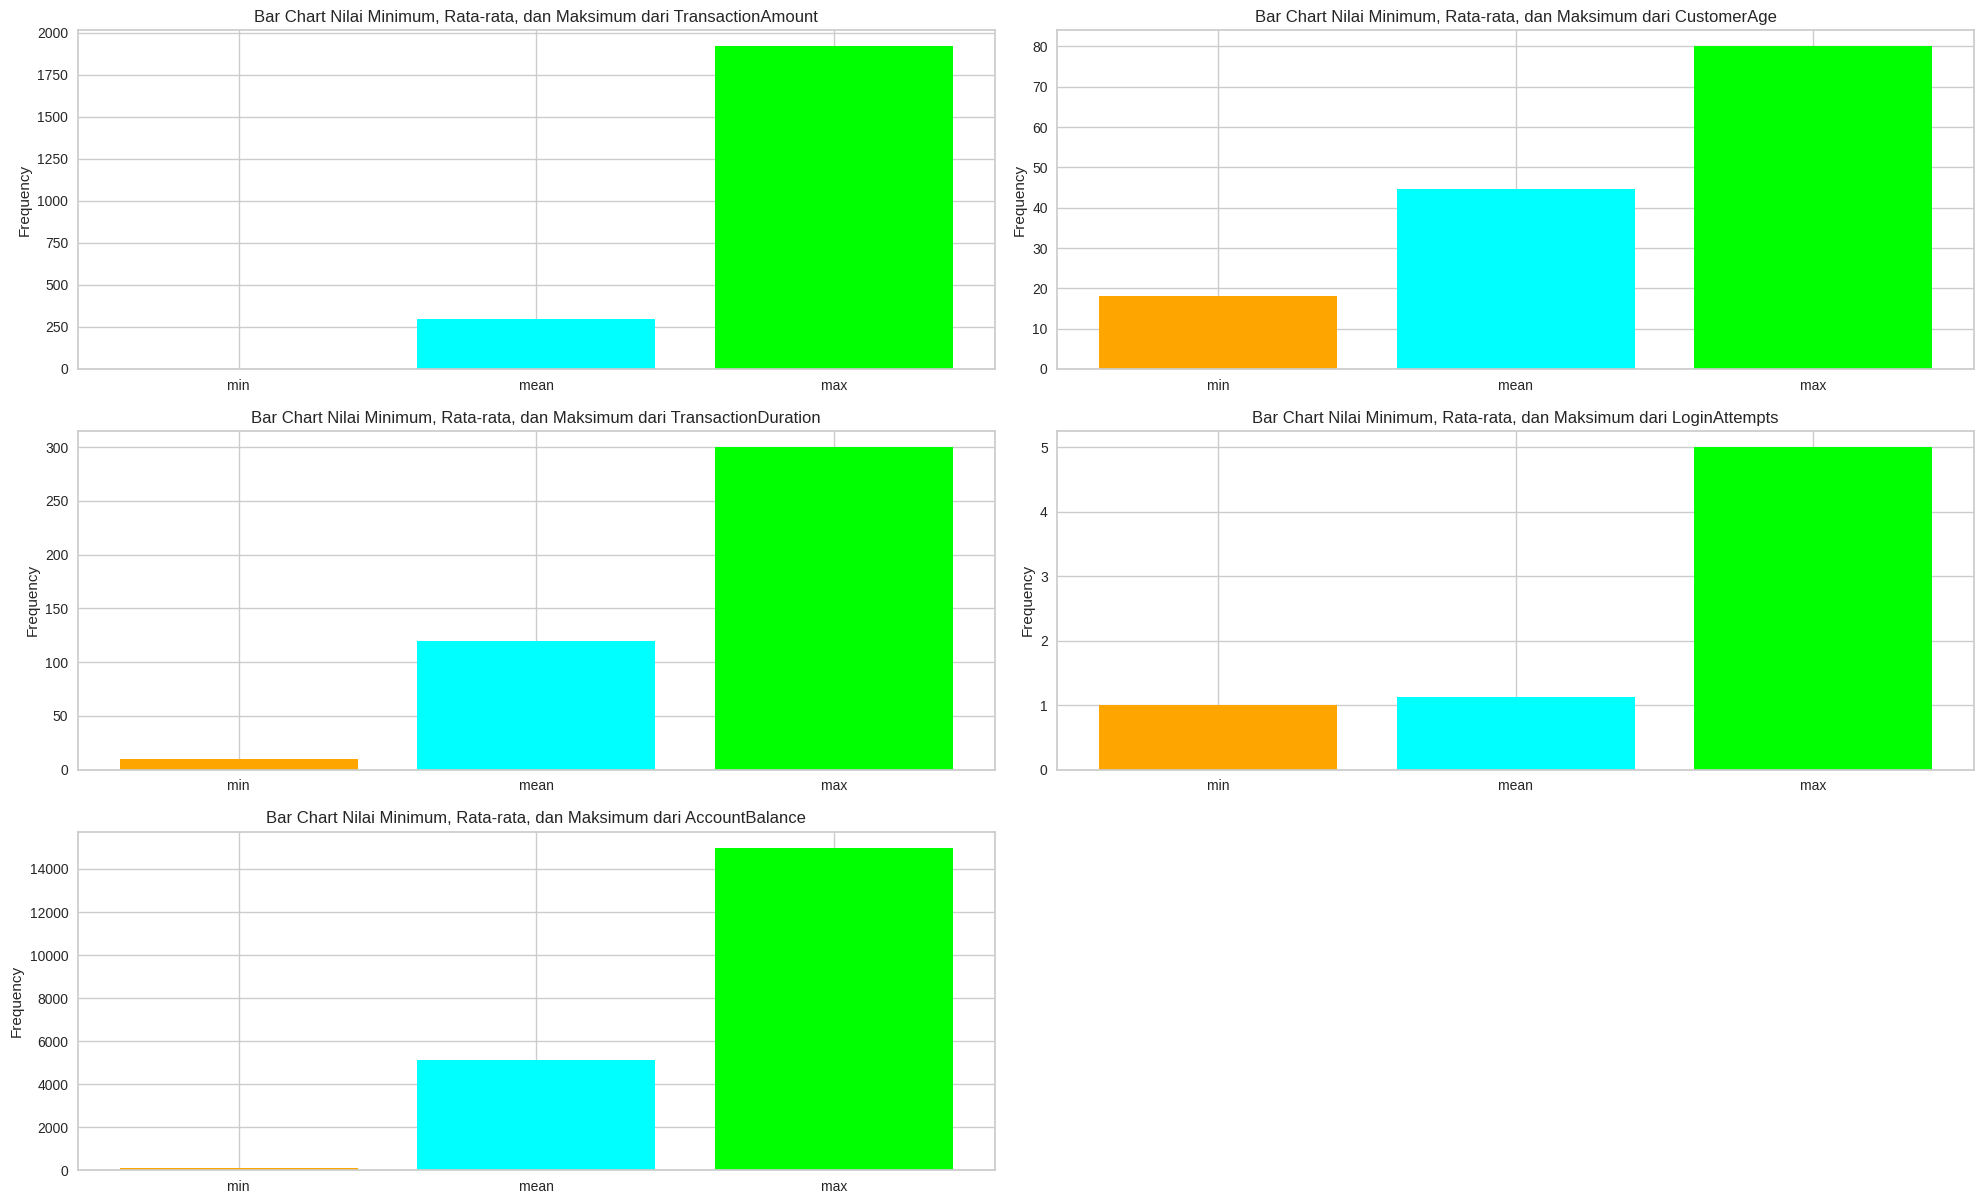

In [8]:
n_cols = 2
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()

mean_vals = df[numerical_cols].mean()
min_vals = df[numerical_cols].min()
max_vals = df[numerical_cols].max()

for i, column in enumerate(df[numerical_cols]):
    stats = df[column].agg(['min','mean','max'])
    axes[i].bar(stats.index, stats.values, color=['orange','cyan','lime'])
    axes[i].set_title(f"Bar Chart Nilai Minimum, Rata-rata, dan Maksimum dari {column}")
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("Missing values per fitur:")
print(df.isnull().sum())

Missing values per fitur:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("Baris duplikat:")
print(df.duplicated().sum())

Baris duplikat:
21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,-0.970546,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,TX000002,AC00455,0.268963,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,TX000003,AC00019,-0.586526,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,TX000004,AC00070,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,TX000005,AC00411,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1)

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,2023-04-11 16:29:14,Debit,San Diego,ATM,1.419862,Doctor,-0.548393,-0.204629,-0.000315,2024-11-04 08:08:08
1,0.268963,2023-06-27 16:44:19,Debit,Houston,ATM,1.307715,Doctor,0.307960,-0.204629,2.218381,2024-11-04 08:09:35
2,-0.586526,2023-07-10 18:16:08,Debit,Mesa,Online,-1.439874,Student,-0.905207,-0.204629,-1.024091,2024-11-04 08:07:04
3,-0.387294,2023-05-05 16:32:11,Debit,Raleigh,Online,-1.047361,Student,-1.347656,-0.204629,0.886694,2024-11-04 08:09:06
4,-0.972736,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,1.121495,-0.204629,0.594263,2024-11-04 08:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
date_cols = ['TransactionDate', 'PreviousTransactionDate']

dates = df[date_cols].copy()
df = df.drop(date_cols, axis=1)
encoders = {}

for column in categorical_cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.970546,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315
1,0.268963,1,15,0,1.307715,0,0.307960,-0.204629,2.218381
2,-0.586526,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091
3,-0.387294,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694
4,-0.972736,0,1,2,NaN,3,1.121495,-0.204629,0.594263


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
missing_values = df.isnull().sum()

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

for column in categorical_cols:
    df[column] = df[column].fillna(df[column].mode()[0])

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [16]:
df = df.drop_duplicates()

print("Baris duplikat:")
print(df.duplicated().sum())

print("\nDataFrame setelah menghapus duplikat:")
print(df)

Baris duplikat:
0

DataFrame setelah menghapus duplikat:
      TransactionAmount  TransactionType  Location  Channel  CustomerAge  \
0             -0.970546                1        36        0     1.419862   
1              0.268963                1        15        0     1.307715   
2             -0.586526                1        23        2    -1.439874   
3             -0.387294                1        33        2    -1.047361   
4             -0.972736                0         1        2     0.018031   
...                 ...              ...       ...      ...          ...   
2508          -0.157840                1        40        1     0.186250   
2509          -0.920781                1        36        1     0.634836   
2510          -0.382263                1        10        2    -1.215581   
2511          -0.186796                0        17        2    -1.159507   
2524          -0.224308                1        29        0    -0.430555   

      CustomerOccupation  Tran

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

condition = ~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numerical_cols]

df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_cols]], axis=1)
df[date_cols] = dates

df.describe(include="all")

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate
count,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2259,2262
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2258,360
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-28 17:31:03,2024-11-04 08:09:17
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,17
mean,-0.145968,-0.001724,-0.007442,-2.046294e-01,0.002261,0.789059,21.346608,1.010503,1.529978,NaN,NaN
std,0.741725,0.989640,0.992768,9.189106e-15,0.990809,0.439076,12.425883,0.827967,1.147829,NaN,NaN
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,-0.750094,-0.991288,-0.805299,-2.046294e-01,-0.919796,1.000000,11.000000,0.000000,1.000000,NaN,NaN
50%,-0.333593,0.018031,-0.105944,-2.046294e-01,-0.097334,1.000000,21.000000,1.000000,2.000000,NaN,NaN
75%,0.256162,0.803056,0.593411,-2.046294e-01,0.643324,1.000000,32.000000,2.000000,3.000000,NaN,NaN


In [18]:
bins_age = [-2, -1, 0, 1, 2]
labels_age = ['Very Low', 'Low', 'Medium', 'High']
df['BinningAge'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)
label_encoder = LabelEncoder()
df['BinningAge'] = label_encoder.fit_transform(df['BinningAge'])
encoders['BinningAge'] = label_encoder

df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate,BinningAge
0,-0.970546,1.419862,-0.548393,-0.204629,-0.000315,1,36,0,0,2023-04-11 16:29:14,2024-11-04 08:08:08,0
1,0.268963,1.307715,0.307960,-0.204629,2.218381,1,15,0,0,2023-06-27 16:44:19,2024-11-04 08:09:35,0
2,-0.586526,-1.439874,-0.905207,-0.204629,-1.024091,1,23,2,3,2023-07-10 18:16:08,2024-11-04 08:07:04,3
3,-0.387294,-1.047361,-1.347656,-0.204629,0.886694,1,33,2,3,2023-05-05 16:32:11,2024-11-04 08:09:06,3
4,-0.972736,0.018031,1.121495,-0.204629,0.594263,0,1,2,3,2023-10-16 17:51:24,2024-11-04 08:06:39,2


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe(include="all")

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate,BinningAge
count,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2259,2262,2285.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2258,360,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-28 17:31:03,2024-11-04 08:09:17,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,17,NaN
mean,-0.145968,-0.001724,-0.007442,-2.046294e-01,0.002261,0.789059,21.346608,1.010503,1.529978,NaN,NaN,1.564989
std,0.741725,0.989640,0.992768,9.189106e-15,0.990809,0.439076,12.425883,0.827967,1.147829,NaN,NaN,1.033078
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,-0.750094,-0.991288,-0.805299,-2.046294e-01,-0.919796,1.000000,11.000000,0.000000,1.000000,NaN,NaN,1.000000
50%,-0.333593,0.018031,-0.105944,-2.046294e-01,-0.097334,1.000000,21.000000,1.000000,2.000000,NaN,NaN,2.000000
75%,0.256162,0.803056,0.593411,-2.046294e-01,0.643324,1.000000,32.000000,2.000000,3.000000,NaN,NaN,2.000000


      Transaction Amount  Account Balance
0              -0.970546        -0.000315
1               0.268963         2.218381
2              -0.586526        -1.024091
3              -0.387294         0.886694
4              -0.972736         0.594263
...                  ...              ...
2280           -0.157840        -1.246713
2281           -0.920781        -0.444044
2282           -0.382263        -0.856135
2283           -0.186796        -1.278402
2284           -0.224308         0.404504

[2285 rows x 2 columns]


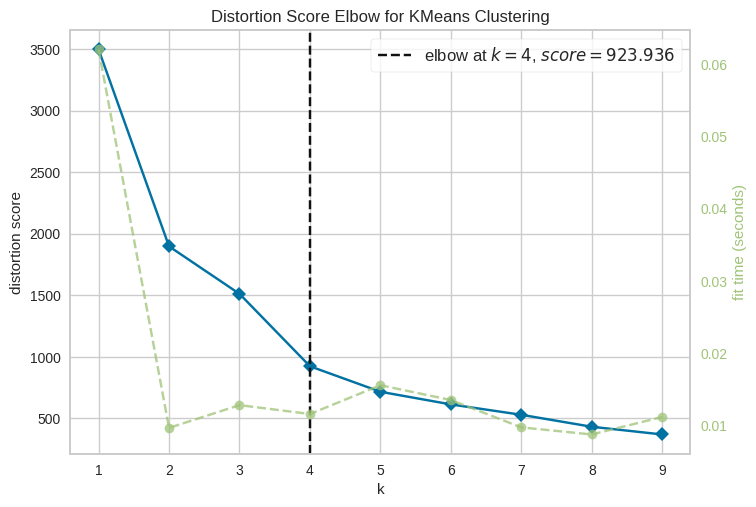

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df.iloc[:, [0,4]].values

print(pd.DataFrame(X, columns=['Transaction Amount', 'Account Balance']))

kmeans = KMeans()
Visualizer = KElbowVisualizer(kmeans, k=(1,10))
Visualizer.fit(X)
Visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
X_model = df[numerical_cols].values

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_model)
labels = kmeans.labels_
k = 3

def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_amount = cluster_data[:, 0].mean()
        mean_age = cluster_data[:, 1].mean()
        mean_duration = cluster_data[:, 2].mean()
        mean_attempts = cluster_data[:, 3].mean()
        mean_balance = cluster_data[:, 4].mean()

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata (mean) Transaction Amount: {mean_amount}")
        print(f"Rata-rata (mean) Customer Age: {mean_age}")
        print(f"Rata-rata (mean) Transaction Duration: {mean_duration}")
        print(f"Rata-rata (mean) Login Attempts: {mean_attempts}")
        print(f"Rata-rata (mean) Account Balance: {mean_balance}")

analyze_clusters(X_model, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata (mean) Transaction Amount: -0.15832765198451687
Rata-rata (mean) Customer Age: -0.025302435935142892
Rata-rata (mean) Transaction Duration: 0.015617750458419151
Rata-rata (mean) Login Attempts: -0.20462940762647447
Rata-rata (mean) Account Balance: 1.2081569412908684

Cluster 2:
Rata-rata (mean) Transaction Amount: -0.16113729101882188
Rata-rata (mean) Customer Age: 0.9501658787137564
Rata-rata (mean) Transaction Duration: -0.06598113603946787
Rata-rata (mean) Login Attempts: -0.2046294076264745
Rata-rata (mean) Account Balance: -0.15442886526145122

Cluster 3:
Rata-rata (mean) Transaction Amount: -0.11834184343304896
Rata-rata (mean) Customer Age: -1.037405331794983
Rata-rata (mean) Transaction Duration: 0.03737747729103402
Rata-rata (mean) Login Attempts: -0.20462940762647447
Rata-rata (mean) Account Balance: -0.8770565098959486


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.1529189758032195


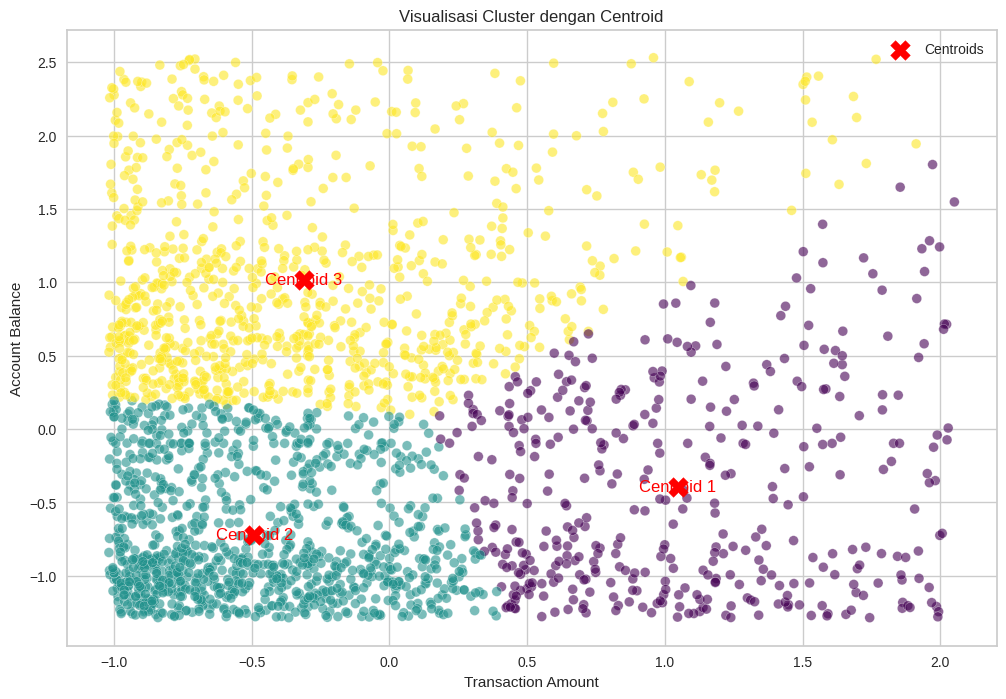

Nilai Centroids:
Centroid 1: Transaction Amount = 1.05, Account Balance = -0.39
Centroid 2: Transaction Amount = -0.49, Account Balance = -0.72
Centroid 3: Transaction Amount = -0.31, Account Balance = 1.02


In [24]:
kmeans_visual = KMeans(n_clusters=3, random_state=0)
kmeans_visual.fit(X)

labels = kmeans_visual.labels_

centroids = kmeans_visual.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.legend()

plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Transaction Amount = {centroid[0]:.2f}, Account Balance = {centroid[1]:.2f}")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_model)
df_PCA = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5'])

kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(df_PCA)

labels = kmeans_pca.labels_

analyze_clusters(df_PCA.values, labels, k)

score = silhouette_score(df_PCA, labels)
print("\nSilhouette Score:", score)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata (mean) Transaction Amount: 0.8311119627924308
Rata-rata (mean) Customer Age: 0.1101138857901756
Rata-rata (mean) Transaction Duration: -0.8674962551053051
Rata-rata (mean) Login Attempts: 0.001650529315365801
Rata-rata (mean) Account Balance: -1.8578395755872388e-16

Cluster 2:
Rata-rata (mean) Transaction Amount: 0.5643827331025288
Rata-rata (mean) Customer Age: -0.008872111301080777
Rata-rata (mean) Transaction Duration: 0.784625519143888
Rata-rata (mean) Login Attempts: 0.007673736760490727
Rata-rata (mean) Account Balance: 1.1918570705534768e-16

Cluster 3:
Rata-rata (mean) Transaction Amount: -1.3521399820434539
Rata-rata (mean) Customer Age: -0.08632492818238752
Rata-rata (mean) Transaction Duration: -0.11302440810294466
Rata-rata (mean) Login Attempts: -0.00995676286996982
Rata-rata (mean) Account Balance: -5.754027947469806e-17

Silhouette Score: 0.25362378679447733


In [26]:
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df['cluster'] = kmeans.labels_

df.groupby('cluster')[numerical_cols].agg(['mean', 'min', 'max'])

TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
cluster                                                                         
0               -0.158328 -1.017676  2.050618   -0.025302 -1.495947  1.419862   
1               -0.161137 -1.015896  2.022484    0.950166 -0.262336  1.980594   
2               -0.118342 -1.017881  2.028200   -1.037405 -1.495947  0.242324   

        TransactionDuration                     LoginAttempts            \
                       mean       min       max          mean       min   
cluster                                                                   
0                  0.015618 -1.561745  2.577295     -0.204629 -0.204629   
1                 -0.065981 -1.561745  2.563023     -0.204629 -0.204629   
2                  0.037377 -1.561745  2.563023     -0.204629 -0.204629   

                  AccountBalance                      
              max           mean       min       max  
cluster                                               
0       -0.204629       1.208157  0.047576  2.531190  
1       -0.204629      -0.154429 -1.281061  1.030025  
2       -0.204629      -0.877057 -1.286100  0.426709

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (Nasabah dengan Nilai Transaksi Kecil dan Saldo Besar)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse>-0.158328 <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse>-0.025302 <Setelah inverse>
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse>0.015618 <Setelah inverse>
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse>-0.204629 <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse>1.208157 <Setelah inverse>
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo besar, namun nilai transaksi kecil. Nasabah berusia rata-rata. Pola ini cenderung normal, kemungkinan merupakan kelompok nasabah yang memiliki aset banyak untuk ditransaksikan.
2. **Cluster 2: (Nasabah dengan Nilai Transaksi Kecil dan Saldo Sedang)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse>-0.161137 <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse>0.950166 <Setelah inverse>
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse>-0.065981 <Setelah inverse>
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse>-0.204629 <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse>-0.154429 <Setelah inverse>
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo sedang dan nilai transaksi kecil. Nasabah berusia lebih tua. Pola ini cenderung normal, kemungkinan merupakan kelompok nasabah orang tua yang jarang bertransaksi.
3. **Cluster 3: (Nasabah dengan Nilai Transaksi Sedang dan Saldo Kecil)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse>-0.118342 <Setelah inverse>
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse>-1.037405 <Setelah inverse>
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse>0.037377 <Setelah inverse>
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse>-0.204629 <Setelah inverse>
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse>-0.877057 <Setelah inverse>
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo kecil, namun nilai transaksi sedang. Nasabah ini berusia lebih muda. Pola ini mengindikasikan potensi fraud karena aktivitas cash flow cepat, namun saldo kecil.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'cluster' : 'Target'})

In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
df_inverse = df.copy()
df_inverse = df_inverse.drop('Target', axis=1)

df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate,BinningAge
0,14.09,70.0,81.0,1.0,5112.21,1,36,0,0,2023-04-11 16:29:14,2024-11-04 08:08:08,0
1,376.24,68.0,141.0,1.0,13758.91,1,15,0,0,2023-06-27 16:44:19,2024-11-04 08:09:35,0
2,126.29,19.0,56.0,1.0,1122.35,1,23,2,3,2023-07-10 18:16:08,2024-11-04 08:07:04,3
3,184.50,26.0,25.0,1.0,8569.06,1,33,2,3,2023-05-05 16:32:11,2024-11-04 08:09:06,3
4,13.45,45.0,198.0,1.0,7429.40,0,1,2,3,2023-10-16 17:51:24,2024-11-04 08:06:39,2


In [31]:
for col in categorical_cols:
    label_encoder = encoders[col]
    df_inverse[col] = label_encoder.inverse_transform(df_inverse[col].astype(int))

label_encoder = encoders['BinningAge']
df_inverse['BinningAge'] = label_encoder.inverse_transform(df_inverse['BinningAge'].astype(int))

df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,TransactionDate,PreviousTransactionDate,BinningAge
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,2023-04-11 16:29:14,2024-11-04 08:08:08,High
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,2023-06-27 16:44:19,2024-11-04 08:09:35,High
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,2023-07-10 18:16:08,2024-11-04 08:07:04,Very Low
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,2023-05-05 16:32:11,2024-11-04 08:09:06,Very Low
4,13.45,45.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,2023-10-16 17:51:24,2024-11-04 08:06:39,Medium


In [32]:
df_inverse['cluster'] = kmeans.labels_

num_deskriptif = df_inverse.groupby('cluster')[numerical_cols].agg(['mean', 'min', 'max'])
cat_deskriptif = df_inverse.groupby('cluster')[categorical_cols].agg(pd.Series.mode)

deskriptif = pd.concat([num_deskriptif, cat_deskriptif], axis=1)
deskriptif.head()

,"(TransactionAmount, mean)","(TransactionAmount, min)","(TransactionAmount, max)","(CustomerAge, mean)","(CustomerAge, min)","(CustomerAge, max)","(TransactionDuration, mean)","(TransactionDuration, min)","(TransactionDuration, max)","(LoginAttempts, mean)","(LoginAttempts, min)","(LoginAttempts, max)","(AccountBalance, mean)","(AccountBalance, min)","(AccountBalance, max)",TransactionType,Location,Channel,CustomerOccupation
cluster,,,,,,,,,,,,,,,,,,,
0,251.397534,0.32,896.79,44.227205,18.0,70.0,120.517190,10.0,300.0,1.0,1.0,1.0,9821.866502,5298.85,14977.99,Debit,Fort Worth,Branch,Doctor
1,250.576635,0.84,888.57,61.623529,40.0,80.0,114.800000,10.0,299.0,1.0,1.0,1.0,4511.598059,120.89,9127.65,Debit,Charlotte,Branch,Retired
2,263.080274,0.26,890.24,26.177546,18.0,49.0,122.041775,10.0,299.0,1.0,1.0,1.0,1695.374112,101.25,6776.41,Debit,Los Angeles,Branch,Student


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (Nasabah dengan Nilai Transaksi Kecil dan Saldo Besar)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>251.397534
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>44.227205
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse> <Setelah inverse>120.517190
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse> <Setelah inverse>1.0
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>9821.866502
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo besar, namun nilai transaksi kecil. Nasabah berusia rata-rata, kemungkinan merupakan kelompok nasabah yang memiliki aset banyak untuk ditransaksikan.
2. **Cluster 2: (Nasabah dengan Nilai Transaksi Kecil dan Saldo Sedang)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>250.576635
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>61.623529
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse> <Setelah inverse>114.800000
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse> <Setelah inverse>1.0
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>4511.598059
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo sedang dan nilai transaksi kecil. Nasabah berusia lebih tua, kemungkinan merupakan kelompok nasabah orang tua yang jarang bertransaksi.
3. **Cluster 3: (Nasabah dengan Nilai Transaksi Sedang dan Saldo Kecil)**:
  - **Rata-rata (mean) TransactionAmount:** <Sebelum inverse> <Setelah inverse>263.080274
  - **Rata-rata (mean) CustomerAge:** <Sebelum inverse> <Setelah inverse>26.177546
  - **Rata-rata (mean) 	TransactionDuration:** <Sebelum inverse> <Setelah inverse>122.041775
  - **Rata-rata (mean) 	LoginAttempts:** <Sebelum inverse> <Setelah inverse>1.0
  - **Rata-rata (mean) AccountBalance:** <Sebelum inverse> <Setelah inverse>1695.374112
  - **Analisis:** Cluster ini mencakup nasabah dengan saldo kecil, namun nilai transaksi sedang. Nasabah ini berusia lebih muda, kemungkinan nasabah di kelompok ini terindikasi mencurigakan.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
df_inverse = df_inverse.rename(columns={'cluster' : 'Target'})

In [34]:
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.